# Student: Dorin Doncenco

Note: runner.py and environment.py have been slightly tinkered with; (1) to return a list of regrets (2) to allow the running of batches with epsilon and temperature agents (epsGreedy and Boltzmann Explo).

# TP 2 - Bandit Algorithms (November 23)

In this assignement, we will focus on the MultiArmed Bandits problem.
You will implement:


- Deterministic policy UCB1 normal  https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf or Chapter 7 of Bandit Algorithms

- Boltzmann Exploration (Softmax) https://www.cs.mcgill.ca/~vkules/bandits.pdf

- KL-UCB https://hal.archives-ouvertes.fr/hal-00738209v2 or Chapter 10.2 of Bandits Algorithm

- Best Empirical Sampled Average (BESA) https://hal.archives-ouvertes.fr/hal-01025651v1/document 

- Thompson Sampling Agent  https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf, https://en.wikipedia.org/wiki/Thompson_sampling or Chapter 35 and 36 of Bandits Algorithms


![image not found:](multiarmedbandit.jpg "Bandits")

You will be evaluated on:
* Implementation of the agents. Points will be granted to clean, scalable code.
* A small paragraph with an analysis of the behavior of the agent and your understanding of the algorithm
* Answering this question -> for each implemented agent, give 1 pros and 1 cons ?

Send this notebook  to cyriaque.rousselot@inria.fr before next course.

Good Luck !

## Example : Random Agent and Epsilon Greedy Agent


In `choose`, prescribe how the agent selects its
actions (interact must return an action, that is
an index in `[0, ..., n_a]`).

In `update`, implement how the agent updates
its knowledge, using the newly observed `action` and `reward`.

In [42]:
from matplotlib import pyplot as plt
import runner, environment
import numpy as np

### Agent Definition

In [43]:
class RandomAgent:
    def __init__(self, n_a):
        self.n_a = n_a  # number of possible actions
        """Init a new agent.
        """

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        return np.random.randint(0, self.n_a)

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        pass

In [44]:
class epsGreedyAgent:
    def __init__(self, n_a, epsilon):
        self.n_a = n_a  # number of possible actions
        self.A = range(n_a)
        self.mu = {a : 0 for a in self.A}
        self.count = {a: 0 for a in self.A}
        self.epsilon = epsilon

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        # explore the unexplored if we have any empties
        for a in self.A:
            if self.count[a] == 0:
                return a

        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_a)
        else:
            return max(self.mu, key=self.mu.get)

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action] = (self.mu[action] * self.count[action] + reward) / (self.count[action] + 1)
        self.count[action] += 1
        

### Agent Evaluation

There exists two classes from the ```environment``` package, ```environment.EasyEnvironment``` and ```environment.HardEnvironement```. Try the agents on both for your analysis.

The Environment Class takes two arguments: ```n_a``` the number of actions and ```variability```, a parameter between 0 and 1 that influence the spreading of distribution of the reward between bandits.

Simulation step 1:
 ->            action: 3
 ->            reward: 0
 -> cumulative reward: 0.0
Simulation step 2:
 ->            action: 5
 ->            reward: 1
 -> cumulative reward: 1.0
Simulation step 3:
 ->            action: 0
 ->            reward: 1
 -> cumulative reward: 2.0
Simulation step 4:
 ->            action: 3
 ->            reward: 1
 -> cumulative reward: 3.0
Simulation step 5:
 ->            action: 1
 ->            reward: 1
 -> cumulative reward: 4.0
Simulation step 6:
 ->            action: 9
 ->            reward: 1
 -> cumulative reward: 5.0
Simulation step 7:
 ->            action: 3
 ->            reward: 1
 -> cumulative reward: 6.0
Simulation step 8:
 ->            action: 5
 ->            reward: 1
 -> cumulative reward: 7.0
Simulation step 9:
 ->            action: 2
 ->            reward: 1
 -> cumulative reward: 8.0
Simulation step 10:
 ->            action: 3
 ->            reward: 0
 -> cumulative reward: 8.0
Simulation step 11:
 ->            acti

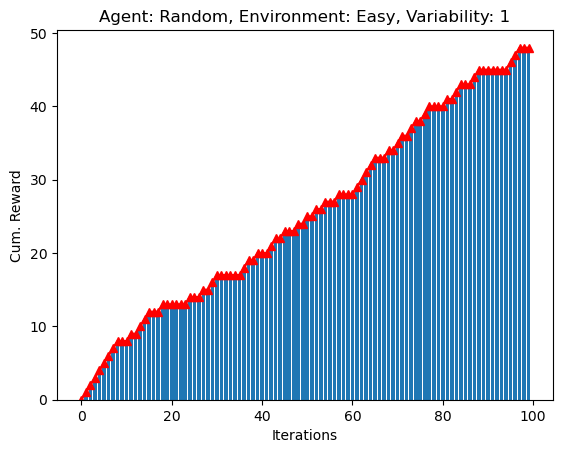

In [45]:
# Looping on a single environement and a single agent
niter = 100
n_actions = 10
my_agent = RandomAgent(n_actions)
my_env = environment.EasyEnvironment(n_actions, variability=1)
my_runner = runner.Runner(
    my_env, my_agent, verbose=True
)  # The verbose parameter allows displaying every step
final_reward, list_cumul, list_regret = my_runner.loop(niter)
print("Obtained a final reward of {}".format(final_reward))

plt.bar(range(niter), list_cumul)
plt.plot(list_cumul, marker="^", color="red")
plt.xlabel("Iterations")
plt.ylabel("Cum. Reward")
plt.title("Agent: Random, Environment: Easy, Variability: 1")
plt.show()

In [46]:
# Running a batched simulation with n_agents agents in parallel

niter = 1000
n_agents = 10
n_actions = 10
variability = 1
my_runner = runner.BatchRunner(
    environment.EasyEnvironment,
    RandomAgent,
    n_agents,
    n_actions,
    variability=variability,
    verbose=False,
)
final_reward_rd, list_cumul_rd, list_regret = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

Random Agent obtained a final average reward of 513.5000000000006


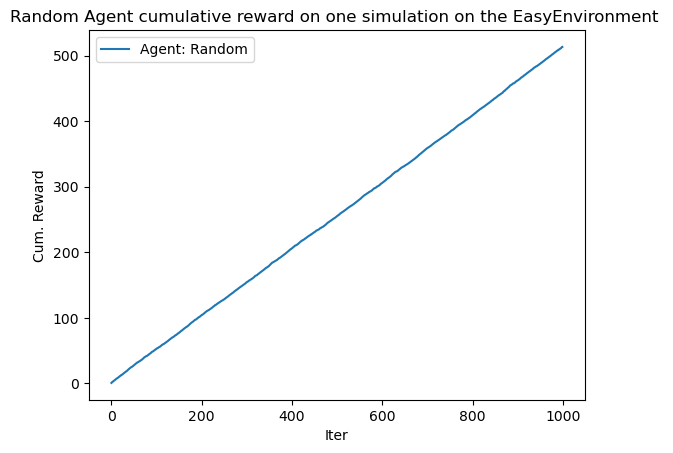

In [47]:
plt.plot(list_cumul_rd, label="Agent: Random")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("Random Agent cumulative reward on one simulation on the EasyEnvironment ")
plt.legend()
plt.show()

You can play with the complexity of the environment by modifying the number of possible actions and variances of the reward distributions . I suggest that you begin with 10 possible actions

In [48]:
# Running a batched simulation with n_agents agents in parallel

niter = 1000
n_agents = 10
n_actions = 30
variability = 1
epsilon = 0.1

my_runner = runner.BatchRunner(
    environment.EasyEnvironment, epsGreedyAgent, n_agents, n_actions, variability, epsilon=epsilon, verbose=False
)
final_reward_rd, list_cumul_rd, list_regrets = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

Random Agent obtained a final average reward of 896.5999999999934


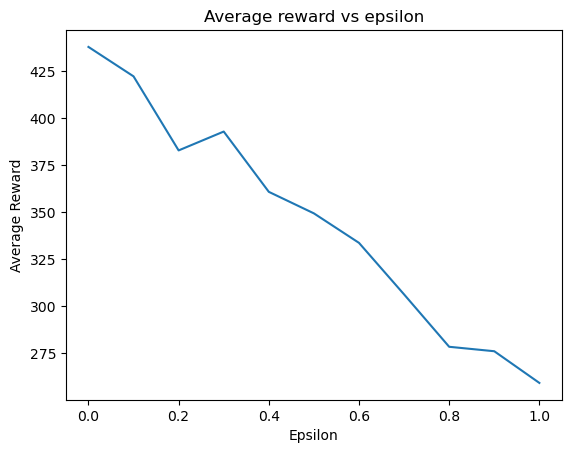

In [49]:
n_actions = 10
variability = 1
n_agents = 50
rewards = []
niter = 1000
#epsilon values to check / steps
step = 0.1
max_step = 1
rewards = np.zeros((int(max_step / step) + 1, niter))
for epsilon in np.arange(0, max_step + step, step):
    my_runner = runner.BatchRunner(
        environment.EasyEnvironment, epsGreedyAgent, n_agents, n_actions, variability, epsilon=epsilon, verbose=False
    )
    final_reward_rd, list_cumul_rd, list_regrets = my_runner.loop(niter)
    rewards[int(epsilon / step)] = list_cumul_rd

# plot average reward vs epsilon
plt.plot(np.arange(0, max_step + step, step), np.mean(rewards, axis=1))
plt.xlabel("Epsilon")
plt.ylabel("Average Reward")
plt.title("Average reward vs epsilon")
plt.show()

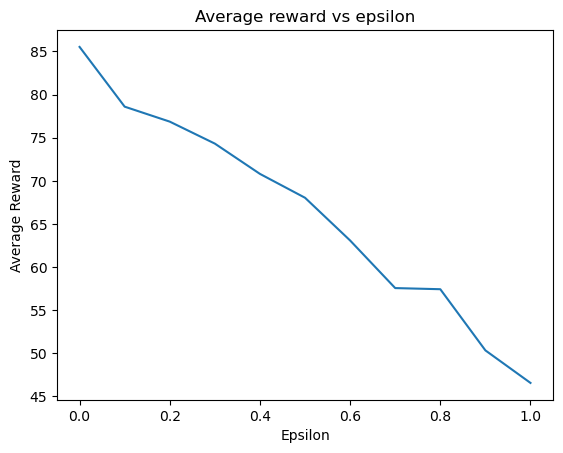

In [50]:
n_actions = 10
variability = 1
n_agents = 20
rewards = []
niter = 200
#epsilon values to check / steps
step = 0.1
max_step = 1
rewards = np.zeros((int(max_step / step) + 1, niter))
for epsilon in np.arange(0, max_step + step, step):
    my_runner = runner.BatchRunner(
        environment.EasyEnvironment, epsGreedyAgent, n_agents, n_actions, variability, epsilon=epsilon, verbose=False
    )
    final_reward_rd, list_cumul_rd, list_regrets = my_runner.loop(niter)
    rewards[int(epsilon / step)] = list_cumul_rd

# plot average reward vs epsilon
plt.plot(np.arange(0, max_step + step, step), np.mean(rewards, axis=1))
plt.xlabel("Epsilon")
plt.ylabel("Average Reward")
plt.title("Average reward vs epsilon")
plt.show()

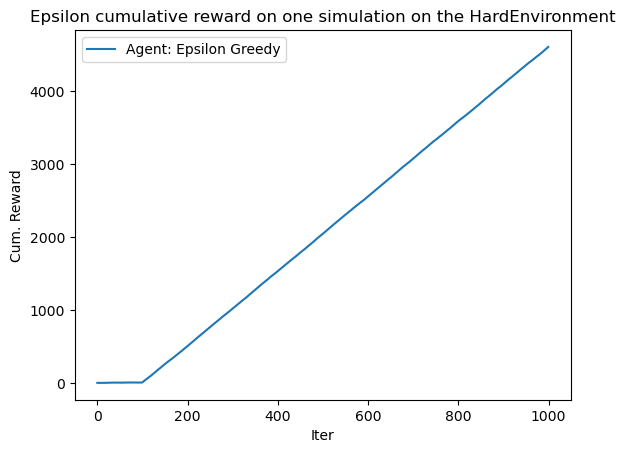

In [51]:
# Best Epsilon greedy is epsilon = 0
n_actions = 100
variability = 1
n_agents = 20
niter = 1000
epsilon = 0
my_runner = runner.BatchRunner(
    environment.HardEnvironment, epsGreedyAgent, n_agents, n_actions, variability, epsilon=epsilon, verbose=False
)
epsilon_final_reward_rd, epsilon_list_cumul_rd, epsilon_list_regrets = my_runner.loop(niter)

plt.plot(epsilon_list_cumul_rd, label="Agent: Epsilon Greedy")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("Epsilon cumulative reward on one simulation on the HardEnvironment")
plt.legend()
plt.show()

> Analysis of Epsilon Greedy

The epsilon greedy agent implemented here is one which is initialized by trying all unexplored actions once, then continues to (1) only take the action which is most valuable 1-$\epsilon$ of the times, and (2) a random action $\epsilon$ of the times. 

We see that the higher the epsilon, the worse the performance of the agent, making an $\epsilon$ of 0 the best. A different amount of actions does not change the trend. **Or does it?**

With $\epsilon=0$, we do not do any exploration past the initialization phase. So if the best machine gives us a 0 and the worst machine gives us a 1, they better one will become "dead": we will never use them again. When we have a lot of machines, this does not present a problem; however, this has a noticeable effect when we have 2 machines only. As such, it is necessary to do a bit of exploration, to be sure that the results we have previously received were reliable. We observe that at 2 machines available, the best $\epsilon$ is, in fact, higher than 0, as there is a peak in its performance at $\epsilon=0.1$.

In [52]:
#warning: the cell below takes a long time to run. Just trust my results

def run_experiment(agent_class, environment_class, n_agents, n_actions, niter, variability, **kwargs):
    my_runner = runner.BatchRunner(
        environment_class, agent_class, n_agents, n_actions, variability, **kwargs
    )
    final_reward, list_cumul, list_regret = my_runner.loop(niter)
    return final_reward, list_cumul, list_regret

n_actions = 6
variability = 1
n_agents = 3000
niter = 500
epsilon_agent = epsGreedyAgent
environment_chosen = environment.EasyEnvironment

# do 11 models with epsilons from 0 to 1 with step 0.1
rewards = []
step = 0.1
max_step = 0.5
rewards = np.zeros((int(max_step / step) + 1, n_actions-1, niter))
for action in range(2, n_actions):
    for epsilon in np.arange(0, max_step + step, step):
        final_reward, list_cumul, list_regret = run_experiment(
            epsilon_agent, environment_chosen, n_agents, action, niter, variability, epsilon=epsilon, verbose=False
        )
        rewards[int(epsilon / step), action-2] = list_cumul

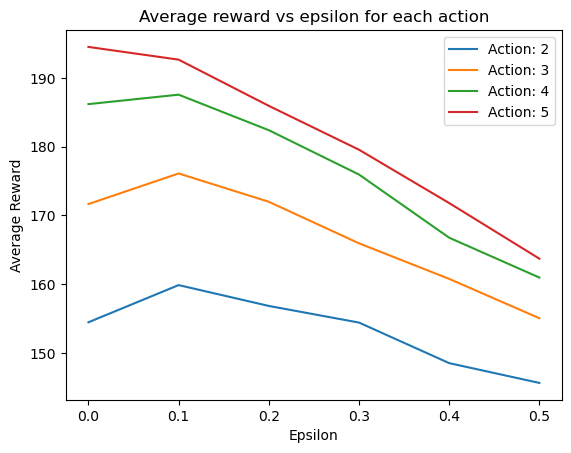

In [53]:
# plot average reward vs epsilon for each action
for action in range(2, n_actions):
    plt.plot(np.arange(0, max_step + step, step), np.mean(rewards[:, action-2], axis=1), label="Action: {}".format(action))
plt.xlabel("Epsilon")
plt.ylabel("Average Reward")
plt.title("Average reward vs epsilon for each action")
plt.legend()
plt.show()

### UCB-1

In [54]:
class UCBAgent:
    # https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf
    def __init__(self, n_actions):
        self.A = range(n_actions)
        self.mu = {a : 0 for a in self.A}
        self.count = {a: 0 for a in self.A}
        self.t = 0

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if self.count[a] == 0:
                return a
        
        averages = [self.mu[a] for a in self.A]
        ln2t = 2*np.log(self.t)
        sqrt_ln2t = np.sqrt(ln2t)
        sqrt_ln2t_n = sqrt_ln2t / np.array([np.sqrt(self.count[a]) for a in self.A])
        a = np.argmax(np.array(averages) + sqrt_ln2t_n)
        return a


    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[a] = (self.mu[a] * self.count[a] + r) / (self.count[a] + 1)
        self.count[a] += 1
        self.t += 1

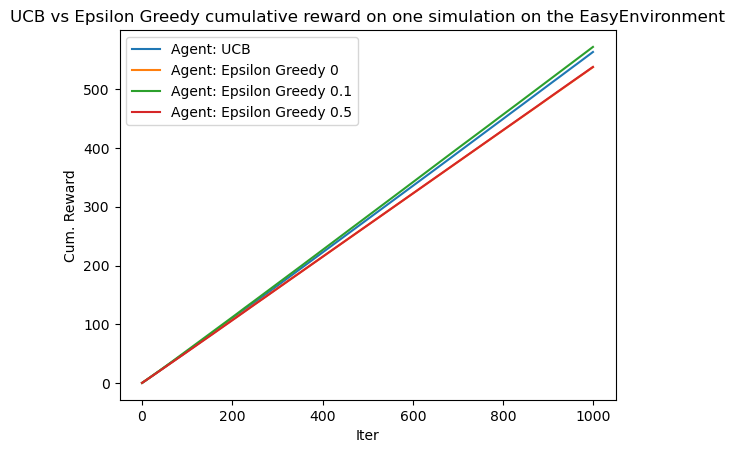

In [55]:
def run_experiment(agent_class, environment_class, n_agents, n_actions, niter, variability, **kwargs):
    my_runner = runner.BatchRunner(
        environment_class, agent_class, n_agents, n_actions, variability, **kwargs
    )
    final_reward, list_cumul, list_regret = my_runner.loop(niter)
    return final_reward, list_cumul, list_regret

n_actions = 2
variability = 0.5
n_agents = 1000
niter = 1000
epsilon = 0
ucb_agent = UCBAgent
epsilon_agent = epsGreedyAgent
environment_chosen = environment.EasyEnvironment
ucb_final_reward_rd, ucb_list_cumul_rd, ucb_list_regrets = run_experiment(UCBAgent, environment_chosen, n_agents, n_actions, niter, variability=variability)
epsilon_final_reward_rd, epsilon_list_cumul_rd, epsilon_list_regrets = run_experiment(epsGreedyAgent, environment_chosen, n_agents, n_actions, niter, variability=variability, epsilon=epsilon)
epsilon = 0.1
epsilon_10_final_reward_rd, epsilon_10_list_cumul_rd, epsilon_10_list_regrets = run_experiment(epsGreedyAgent, environment_chosen, n_agents, n_actions, niter, variability=variability, epsilon=epsilon)
epsilon = 0.5
epsilon_50_final_reward_rd, epsilon_50_list_cumul_rd, epsilon_50_list_regrets = run_experiment(epsGreedyAgent, environment_chosen, n_agents, n_actions, niter, variability=variability, epsilon=epsilon)

ucb_cum_regrets = np.cumsum(ucb_list_regrets)
epsilon_cum_regrets = np.cumsum(epsilon_list_regrets)
epsilon_10_cum_regrets = np.cumsum(epsilon_10_list_regrets)
epsilon_50_cum_regrets = np.cumsum(epsilon_50_list_regrets)

plt.plot(ucb_list_cumul_rd, label="Agent: UCB")
plt.plot(epsilon_list_cumul_rd, label="Agent: Epsilon Greedy 0")
plt.plot(epsilon_10_list_cumul_rd, label="Agent: Epsilon Greedy 0.1")
plt.plot(epsilon_50_list_cumul_rd, label="Agent: Epsilon Greedy 0.5")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("UCB vs Epsilon Greedy cumulative reward on one simulation on the EasyEnvironment")
plt.legend()




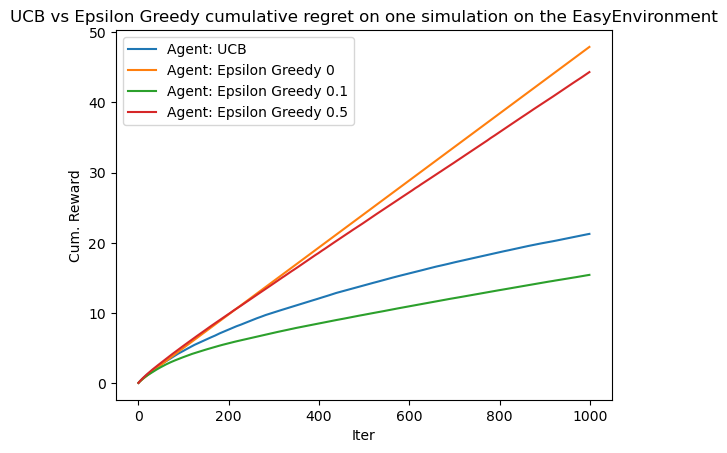

In [56]:
plt.plot(ucb_cum_regrets, label="Agent: UCB")
plt.plot(epsilon_cum_regrets, label="Agent: Epsilon Greedy 0")
plt.plot(epsilon_10_cum_regrets, label="Agent: Epsilon Greedy 0.1")
plt.plot(epsilon_50_cum_regrets, label="Agent: Epsilon Greedy 0.5")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("UCB vs Epsilon Greedy cumulative regret on one simulation on the EasyEnvironment")
plt.legend()

> Analysis of UCB1

The machine m to be played is:

$ argmax_m (\bar{x}_m + \sqrt{\frac{2 ln(n)}{n_m}}) $

where $ \bar{x}_m $ is the mean reward $x$ of machine $m$, $n$ is the amount of actions taken in total by the agent, and $n_m$ is the amount of actions taken for machine $m$.

In other words, in addition to the classic greedy approach where the mean rewards increase the value of a machine, the agent is encouraged to explore machines that have not been "properly" explored before. The more steps are taken without exploring a certain action, the more valuable that action becomes.

### Boltzmann Exploration (Softmax) 

In [57]:
class SoftmaxAgent:  # Chose a Temperature between 0.01 and 1
    # https://www.cs.mcgill.ca/~vkules/bandits.pdf
    def __init__(self, n_actions, temperature):
        self.A = range(n_actions)
        self.mu = {a : 0 for a in self.A}
        self.count = {a: 0 for a in self.A}
        self.temperature = temperature

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if self.count[a] == 0:
                return a
        
        probabilities = [np.exp(self.mu[a] / self.temperature) for a in self.A]
        probabilities = probabilities / np.sum(probabilities)
        return np.random.choice(self.A, p=probabilities)        


    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action] = (self.mu[action] * self.count[action] + reward) / (self.count[action] + 1)
        self.count[action] += 1

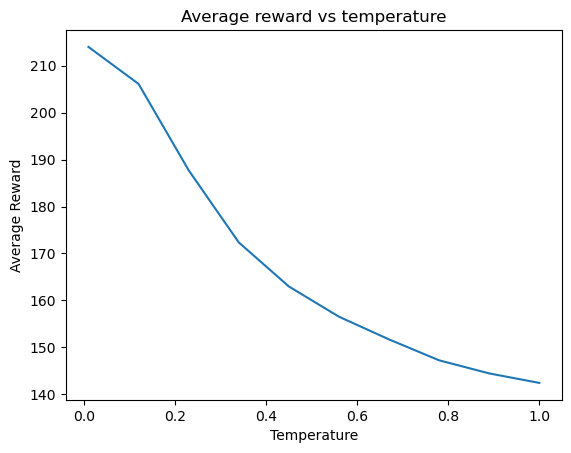

In [58]:
def run_experiment(agent_class, environment_class, n_agents, n_actions, niter, variability, **kwargs):
    my_runner = runner.BatchRunner(
        environment_class, agent_class, n_agents, n_actions, variability, **kwargs
    )
    final_reward, list_cumul, list_regret = my_runner.loop(niter)
    return final_reward, list_cumul, list_regret

n_actions = 10
variability = 1
n_agents = 500
niter = 500

softmax_agent = SoftmaxAgent
environment_chosen = environment.EasyEnvironment
max_temp = 1
steps = 10
temperatures = np.linspace(0.01, max_temp, steps)

rewards = []
rewards = np.zeros((steps, niter))

for i, temperature in enumerate(temperatures):
    final_reward, list_cumul, list_regret = run_experiment(
        softmax_agent, environment_chosen, n_agents, n_actions, niter, variability=variability, temperature=temperature
    )
    rewards[i] = list_cumul

# plot average reward vs temperature
plt.plot(temperatures, np.mean(rewards, axis=1))
plt.xlabel("Temperature")
plt.ylabel("Average Reward")

plt.title("Average reward vs temperature")
plt.show()


> Analysis of Boltzmann Exploration

In the Boltzmann exploration, we make use of the softmax function to define the probabilities of which machine to explore. Given a temperature $\tau$ and $\bar\mu_j$ the empirical means of other $k$ machines $j$, the probability of machine $i$ being chosen is as such:

$ p_i = \frac{e^{\bar{\mu}_i/\tau}}{\sum_{j=1}^m e^{\bar{\mu}/\tau}} $

It is similar to the epsilon greedy agent, in the sense that the agent will give a higher probability to choose the machine with the highest mean. As $\tau$ reaches infinity, the agent will tend to give equal probability to all actions ($e^{\bar{\mu}/\infty} = 1$, => $p_i = \frac{1}{\sum_{j=1}^k 1} = \frac{1}{k}$)

### BESA

In [59]:
class BesaAgent:
    # https://hal.archives-ouvertes.fr/file/index/docid/1025651/filename/BESA2.pdf
    def __init__(self, n_actions):
        self.A = range(n_actions)
        self.mu = {a : [] for a in self.A}

    
    def besa(self, actions):
        if len(actions) == 1:
            return actions[0]
        elif len(actions) == 2:
            count_a = len(self.mu[actions[0]])
            count_b = len(self.mu[actions[1]])
            # subsample from the longest list to have the same length
            if count_a > count_b:
                a_subsample = np.random.choice(self.mu[actions[0]], count_b)
                b_subsample = self.mu[actions[1]]
            elif count_a < count_b:
                a_subsample = self.mu[actions[0]]
                b_subsample = np.random.choice(self.mu[actions[1]], count_a)
            else:
                a_subsample = self.mu[actions[0]]
                b_subsample = self.mu[actions[1]]

            a_mean = np.mean(a_subsample)
            b_mean = np.mean(b_subsample)
            if a_mean > b_mean:
                return actions[0]
            elif a_mean < b_mean:
                return actions[1]
            else:
                # pick the least played action
                if count_a < count_b:
                    return actions[0]
                else:
                    return actions[1]
        else:
            return self.besa([self.besa(actions[:len(actions)//2]), self.besa(actions[len(actions)//2:])])


    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if len(self.mu[a]) == 0:
                return a
        
        return self.besa(self.A)

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action].append(reward)

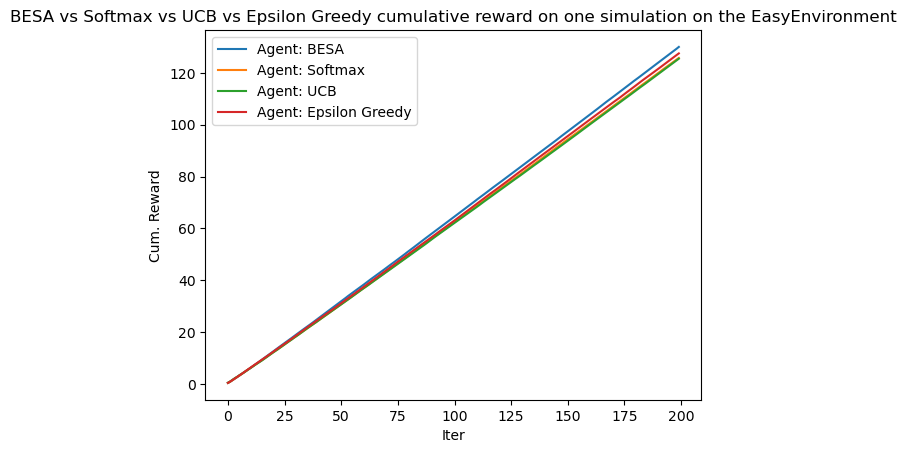

In [60]:
def run_experiment(agent_class, environment_class, n_agents, n_actions, niter, variability, **kwargs):
    my_runner = runner.BatchRunner(
        environment_class, agent_class, n_agents, n_actions, variability, **kwargs
    )
    final_reward, list_cumul, list_regret = my_runner.loop(niter)
    return final_reward, list_cumul, list_regret

n_actions = 2
variability = 1
n_agents = 500
niter = 200

besa_agent = BesaAgent
ucb_agent = UCBAgent
softmax_agent = SoftmaxAgent
epsilon_agent = epsGreedyAgent
environment_chosen = environment.EasyEnvironment

rewards = np.zeros((niter))
#compare besa with softmax temperature = 0.1, ucb and epsilon greedy 0.1
besa_final_reward, besa_list_cumul, besa_list_regret = run_experiment(
    besa_agent, environment_chosen, n_agents, n_actions, niter, variability=variability,
)

softmax_final_reward, softmax_list_cumul, softmax_list_regret = run_experiment(
    softmax_agent, environment_chosen, n_agents, n_actions, niter, variability=variability, temperature=0.1
)

ucb_final_reward, ucb_list_cumul, ucb_list_regret = run_experiment(
    ucb_agent, environment_chosen, n_agents, n_actions, niter, variability=variability
)

epsilon_final_reward, epsilon_list_cumul, epsilon_list_regret = run_experiment(
    epsilon_agent, environment_chosen, n_agents, n_actions, niter, variability=variability, epsilon=0.1
)

plt.plot(besa_list_cumul, label="Agent: BESA")
plt.plot(softmax_list_cumul, label="Agent: Softmax")
plt.plot(ucb_list_cumul, label="Agent: UCB")
plt.plot(epsilon_list_cumul, label="Agent: Epsilon Greedy")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("BESA vs Softmax vs UCB vs Epsilon Greedy cumulative reward on one simulation on the EasyEnvironment")
plt.legend()

> Analysis of BESA

The improvement of the BESA algorithm is that instead of just using the mean of the previous rewards, it takes into account how often these machines have been played by subsampling from the most played machine to achieve the same amount of plays as the least played machine. Compared to epsilon-greedy, the advantage here is that a "good" machine which got unlucky may still get back into the game, because a "bad" machine will eventually luck out and subsample the same score as the unlucky machine.

Due to the method of solving equality (take the least played machine), this ensures that some exploration will be done to machines that are not often played, have a bad score, but might actually be better.

### KL-UCB

In [61]:
class KLUCBAgent:
    # See: https://hal.archives-ouvertes.fr/hal-00738209v2
    def __init__(self, n_actions):
        self.A = range(n_actions)

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        raise NotImplemented

    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        raise NotImplemented

> Analysis of KL-UCB

$ U_a(t) = sup \{ E(\nu): \nu \in D \text{ and } KL(\prod_D(\hat\nu_a(t)), \nu) \leq \frac{f(t)}{N_a(t)} \} $

pick $ A_{t+1} \in \text{ argmax } U_a(t) $

### Thompson Sampling

> Try first to implement the Bernoulli Bandit Thompson Sampling algorithm on the ```EasyEnvironment```. https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf
Additional points will be granted for a Thompson Agent on the ```HardEnvironment```

In [62]:
from scipy.stats import beta
class ThompsonAgent:
    # https://en.wikipedia.org/wiki/Thompson_sampling
    def __init__(self, n_actions):
        self.A = range(n_actions)
        self.alphas = {a : 1 for a in self.A}
        self.betas = {a : 1 for a in self.A}
    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if self.alphas[a] == 1 and self.betas[a] == 1:
                return a
            
        samples = [beta.rvs(self.alphas[a], self.betas[a]) for a in self.A]
        return np.argmax(samples)

    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.alphas[a] += r
        self.betas[a] += 1 - r

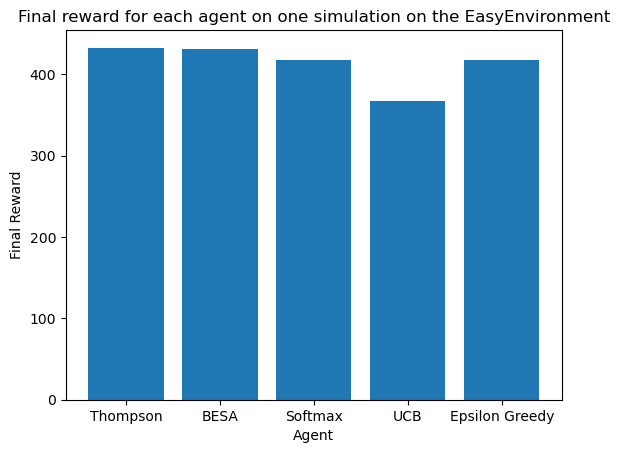

In [63]:
n_actions = 10
variability = 1
n_agents = 300
niter = 500

thompson_agent = ThompsonAgent
besa_agent = BesaAgent
ucb_agent = UCBAgent
softmax_agent = SoftmaxAgent
epsilon_agent = epsGreedyAgent
environment_chosen = environment.EasyEnvironment

rewards = np.zeros((niter))
# compare thompsonagent with the rest

thompson_final_reward, thompson_list_cumul, thompson_list_regret = run_experiment(
    thompson_agent, environment_chosen, n_agents, n_actions, niter, variability=variability,
)

besa_final_reward, besa_list_cumul, besa_list_regret = run_experiment(
    besa_agent, environment_chosen, n_agents, n_actions, niter, variability=variability,
)

softmax_final_reward, softmax_list_cumul, softmax_list_regret = run_experiment(
    softmax_agent, environment_chosen, n_agents, n_actions, niter, variability=variability, temperature=0.1
)

ucb_final_reward, ucb_list_cumul, ucb_list_regret = run_experiment(
    ucb_agent, environment_chosen, n_agents, n_actions, niter, variability=variability
)

epsilon_final_reward, epsilon_list_cumul, epsilon_list_regret = run_experiment(
    epsilon_agent, environment_chosen, n_agents, n_actions, niter, variability=variability, epsilon=0.1
)

#plt bar final rewards
plt.bar(["Thompson", "BESA", "Softmax", "UCB", "Epsilon Greedy"], [thompson_final_reward, besa_final_reward, softmax_final_reward, ucb_final_reward, epsilon_final_reward])
plt.xlabel("Agent")
plt.ylabel("Final Reward")
plt.title("Final reward for each agent on one simulation on the EasyEnvironment")
plt.show()

> Analysis of Thompson Sampling

Unlike previous agents which estimate the values of each machine as the mean of the rewards received, the Bernoulli Thompson Sampling agent estimates a beta distribution for each machine, from which a value is sampled to choose the next function. The update function modifies the beta distribution arguments ($\alpha$, $\beta$) based on the reward received.

Due to its probabilistic nature, this agent finds a nice balance between exploration and exploitation.